# Midterm
- Name: Zach Novak
- PID: za659148
- Submission Date: 3/11/2025

First, import the neccessary libraries and read the csv file in as a DataFrame.

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# load the data
df = pd.read_csv('data/LoanStats3a.csv', skiprows=1, low_memory=False)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,NaN,NaN,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
42534,NaN,NaN,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
42535,NaN,NaN,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
42536,Total amount funded in policy code 1: 460296150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's take inventory of features we have to work with.

In [15]:
list(df.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

Let's take inventory of the unique values in the columns.

In [16]:
unique_values = {col: df[col].unique() for col in df.columns}
for col, values in unique_values.items():
    print(f"Unique values in '{col}' column: {values}\n")

Unique values in 'id' column: [nan 'Loans that do not meet the credit policy'
 'Total amount funded in policy code 1: 460296150'
 'Total amount funded in policy code 2: 0']

Unique values in 'member_id' column: [nan]

Unique values in 'loan_amnt' column: [ 5000.  2500.  2400. 10000.  3000.  7000.  5600.  5375.  6500. 12000.
  9000.  1000.  3600.  6000.  9200. 20250. 21000. 15000.  4000.  8500.
  4375. 31825. 12400. 10800. 12500.  9600.  4400. 14000. 11000. 25600.
 16000.  7100. 13000. 17500. 17675.  8000.  3500. 16425.  8200. 20975.
  6400. 14400.  7250. 18000. 35000. 11800.  4500. 10500. 15300. 20000.
  6200.  7200.  9500. 18825. 24000.  2100.  5500. 26800. 25000. 19750.
 13650. 28000. 10625.  8850.  6375. 11100.  4200.  8875. 13500. 21600.
  8450. 13475. 22000.  7325.  7750. 13350. 22475.  8400. 13250.  7350.
 11500. 29500.  2000. 11625. 15075.  5300.  8650.  7400. 24250. 26000.
  1500. 19600.  4225. 16500. 15600. 14125. 13200. 12300.  1400.  3200.
 11875.  1800. 23200.  4800.  7300.

Let's check the datatypes to know how the data was read in by Pandas.

In [17]:
print(list(df.dtypes))

[dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('float64'), dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'), dtype('float64'), dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'), dtype('float64'), dtype('O'), dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('fl

## 1. What kind of interest rate are borrowers paying? (min, max and mean rate values)

In [18]:
# convert percent values to floats
df.loc[:, 'int_rate'] = df['int_rate'].str.rstrip('%').astype('float') / 100

# get int rate summary statistics
print("Summary statistics for the interest rate column:")
df.describe()

# reconverting to percent
df.loc[:, 'int_rate'] = df['int_rate'] * 100

# print the answer.
print("\nThe lowest interest rate (%) is: ", df['int_rate'].min())    
print("The highest interest rate (%) is: ", df['int_rate'].max())
print("The average interest rate (%) is: ", df['int_rate'].mean().round(2))

Summary statistics for the interest rate column:

The lowest interest rate (%) is:  5.42
The highest interest rate (%) is:  24.59
The average interest rate (%) is:  12.17


## 2. How long are the loan terms? (Min, Max and Mean term values)

In [19]:
# count the number of NaN values in the 'term' column
nan_count = df['term'].isna().sum()
print(f"Number of NaN values in 'term' column: {nan_count}")

# print the unique values in the 'term' column
print("Unique values in 'term' column: ", df['term'].unique())

## drop the NaN values from the 'term' column
# print the number of rows before dropping NaN values
pre = df.shape[0]
print(f"\nNumber of rows before dropping NaN values: {pre}")

# drop the NaN values from the 'term' column
df = df.dropna(subset=['term'])

# print the number of rows after dropping NaN values
post = df.shape[0]
print(f"Number of rows after dropping NaN values: {post}")

# convert values to integers for computations
df.loc[:, 'term'] = df['term'].astype(str)
df.loc[:, 'term'] = df['term'].str.replace(' months', '').astype(int)

# calculate the term feature's statistics summary
print("\nSummary statistics for the 'term' column:")
print(df['term'].describe())

# print the answer
print(f"\nThe shortest term is: {df['term'].min()} months")
print(f"The longest term is: {df['term'].max()} months")
print(f"The average term is: {df['term'].mean().round()} months") # rounded to nearest whole number to account for significant figures

Number of NaN values in 'term' column: 3
Unique values in 'term' column:  [' 36 months' ' 60 months' nan]

Number of rows before dropping NaN values: 42538
Number of rows after dropping NaN values: 42535

Summary statistics for the 'term' column:
count     42535
unique        2
top          36
freq      31534
Name: term, dtype: int64

The shortest term is: 36 months
The longest term is: 60 months
The average term is: 42.0 months


## 3. How much are people borrowing? (Min, Max and Mean amounts)

In [20]:
nan_count = df.loc[:, 'loan_amnt'].isna().sum()
print(f"Number of NaN values in the 'loan_amnt' column: {nan_count}\n")

print(df.loc[:, 'loan_amnt'].describe())

# print the answer
print("\nThe smallest loan amount is: $", df['loan_amnt'].min())
print("The largest loan amount is: $", df['loan_amnt'].max())
print("The average loan amount is: $", df['loan_amnt'].mean().round(2))

Number of NaN values in the 'loan_amnt' column: 0

count    42535.000000
mean     11089.722581
std       7410.938391
min        500.000000
25%       5200.000000
50%       9700.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

The smallest loan amount is: $ 500.0
The largest loan amount is: $ 35000.0
The average loan amount is: $ 11089.72


## 4. What are people taking these loans out for? (list the items)

In [21]:
print("Unique values in 'purpose' column:", list(df['purpose'].unique()))

Unique values in 'purpose' column: ['credit_card', 'car', 'small_business', 'other', 'wedding', 'debt_consolidation', 'home_improvement', 'major_purchase', 'medical', 'moving', 'vacation', 'house', 'renewable_energy', 'educational']


## 5. Are the borrowers renters or homeowners? (list the ownership status items)

In [22]:
print("The borrowers are categorized into the following living situations:", list(df['home_ownership'].unique()))

The borrowers are categorized into the following living situations: ['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE']


## 6. Where do these borrowers live? (list of states)

In [23]:
print("The borrowers live in the following states:", list(df['addr_state'].unique()))

The borrowers live in the following states: ['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT', 'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA', 'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI', 'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS', 'TN', 'IA', 'NE', 'ID', 'IN', 'ME']


## 7. Use a predictor and evaluate your model. (You can use a machine learning classifier, and evaluate your model with metrics, e.g., you can predict the failed vs successful loans)

Let's start by categorizing the feature sets.

In [24]:
# Print non-numeric columns
for column in df.columns:
    try:
        pd.to_numeric(df[column])
    except:
        print(f"Column '{column}' is non-numeric.")

Column 'grade' is non-numeric.
Column 'sub_grade' is non-numeric.
Column 'emp_title' is non-numeric.
Column 'emp_length' is non-numeric.
Column 'home_ownership' is non-numeric.
Column 'verification_status' is non-numeric.
Column 'issue_d' is non-numeric.
Column 'loan_status' is non-numeric.
Column 'pymnt_plan' is non-numeric.
Column 'desc' is non-numeric.
Column 'purpose' is non-numeric.
Column 'title' is non-numeric.
Column 'zip_code' is non-numeric.
Column 'addr_state' is non-numeric.
Column 'earliest_cr_line' is non-numeric.
Column 'revol_util' is non-numeric.
Column 'initial_list_status' is non-numeric.
Column 'last_pymnt_d' is non-numeric.
Column 'next_pymnt_d' is non-numeric.
Column 'last_credit_pull_d' is non-numeric.
Column 'application_type' is non-numeric.
Column 'hardship_flag' is non-numeric.
Column 'disbursement_method' is non-numeric.
Column 'debt_settlement_flag' is non-numeric.
Column 'debt_settlement_flag_date' is non-numeric.
Column 'settlement_status' is non-numeric.

We can filter out non-numeric columns to focus on the numeric columns with plenty of valid data.

In [25]:
# specify the columns to be used
selected_features = ['loan_amnt', 'annual_inc', 'dti', 'int_rate']

# remove redundant context within the loan_status column. We just care if they defaulted or not.
df['loan_status'] = df['loan_status'].str.replace("Does not meet the credit policy. Status:", "", regex=False)

# defined function to convert loan_status to binary
def map_loan_status(status):
    if pd.isna(status):
        return np.nan
    return 1 if isinstance(status, str) and 'Fully Paid' in status else 0 # 1 for fully paid, 0 for charged off

# apply the encoding to the loan_status column
df['loan_status'] = df['loan_status'].apply(map_loan_status)

# drop rows with any NaN values in the selected features and loan_status
df_clean = df[selected_features + ['loan_status']].dropna()
df_clean

C:\Users\Setup User\AppData\Local\Temp\ipykernel_5132\1782257.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_status'] = df['loan_status'].str.replace("Does not meet the credit policy. Status:", "", regex=False)
C:\Users\Setup User\AppData\Local\Temp\ipykernel_5132\1782257.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_status'] = df['loan_status'].apply(map_loan_status)


,loan_amnt,annual_inc,dti,int_rate,loan_status
0,5000.0,24000.0,27.65,10.65,1
1,2500.0,30000.0,1.00,15.27,0
2,2400.0,12252.0,8.72,15.96,1
3,10000.0,49200.0,20.00,13.49,1
4,3000.0,80000.0,17.94,12.69,1
...,...,...,...,...,...
42530,6500.0,20000.0,10.00,9.64,0
42531,3500.0,180000.0,10.00,10.28,1
42532,1000.0,12000.0,10.00,9.64,1
42533,2525.0,110000.0,10.00,9.33,1


It was difficult to wrangle the 'loan_status' column to be binary, however, isolating the string text worked. 

In [26]:
# store dataFrame values in X and y
X_clean = df_clean[selected_features].copy()
y_clean = df_clean['loan_status']

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)
# print unique values in the training and test sets to confirm the presence of predict labels.
print("Unique values in X_train:")
print(X_train.nunique())
print("\nUnique values in X_test:")
print(X_test.nunique())
print("\nUnique values in y_train:")
print(y_train.nunique())
print("\nUnique values in y_test:")
print(y_test.nunique())

# scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nKNN Model Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Unique values in X_train:
loan_amnt      863
annual_inc    4729
dti           2859
int_rate       391
dtype: int64

Unique values in X_test:
loan_amnt      544
annual_inc    1700
dti           2498
int_rate       352
dtype: int64

Unique values in y_train:
2

Unique values in y_test:
2

KNN Model Accuracy: 0.8126
              precision    recall  f1-score   support

           0       0.23      0.12      0.16      1229
           1       0.86      0.93      0.89      7278

    accuracy                           0.81      8507
   macro avg       0.55      0.53      0.53      8507
weighted avg       0.77      0.81      0.79      8507



Through clear data use and understanding, the model was fit and able to be evaluated.

## 8. Visualize your findings.

Loan amount versus interest rate is very noisy as you can see from the visualization. The boxplots let us know in the next iteration, removing outliers could benefit the model.

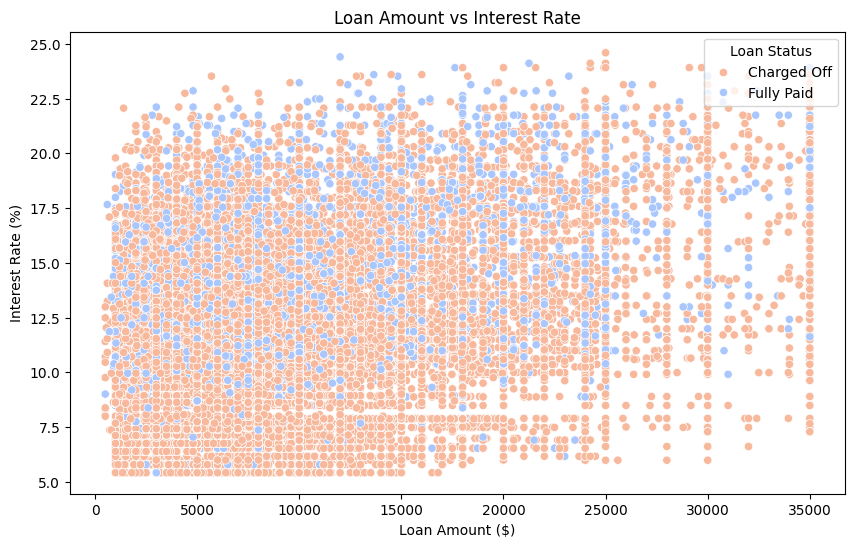

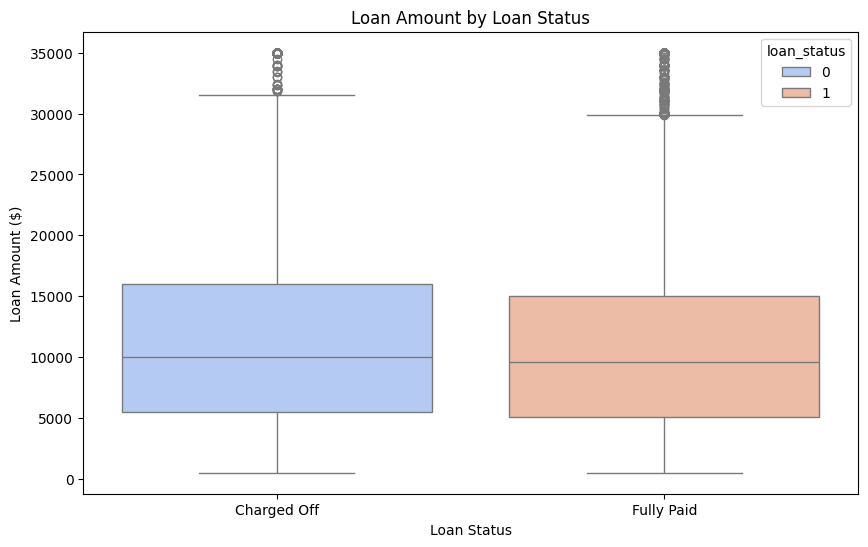

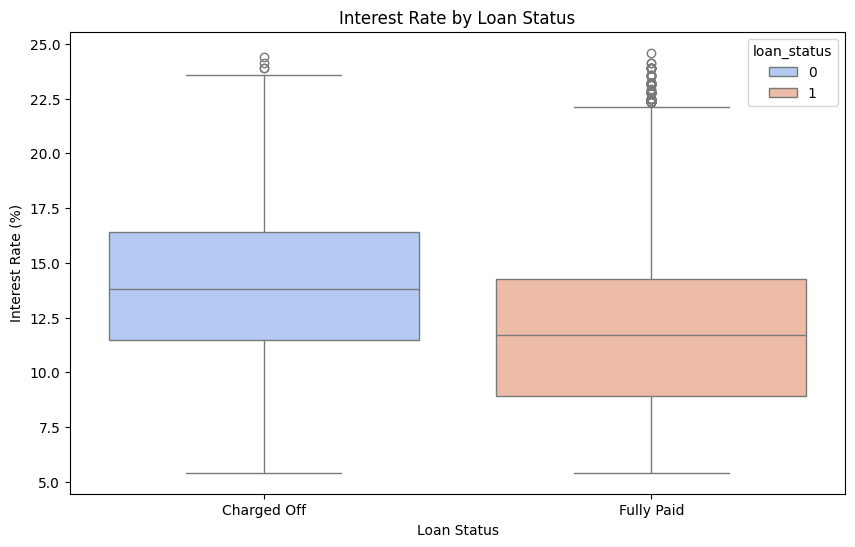

In [31]:
# scatter plot for loan amount vs interest rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='int_rate', hue='loan_status', data=df_clean, palette='coolwarm')
plt.title('Loan Amount vs Interest Rate')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Interest Rate (%)')
plt.legend(title='Loan Status', loc='upper right', labels=['Charged Off', 'Fully Paid'])
plt.show()

# box plot for loan amount by loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df_clean, palette='coolwarm', hue='loan_status')
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount ($)')
plt.xticks([0, 1], ['Charged Off', 'Fully Paid'])
plt.show()

# box plot for interest rate by loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='int_rate', data=df_clean, palette='coolwarm',hue='loan_status')
plt.title('Interest Rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.xticks([0, 1], ['Charged Off', 'Fully Paid'])
plt.show()

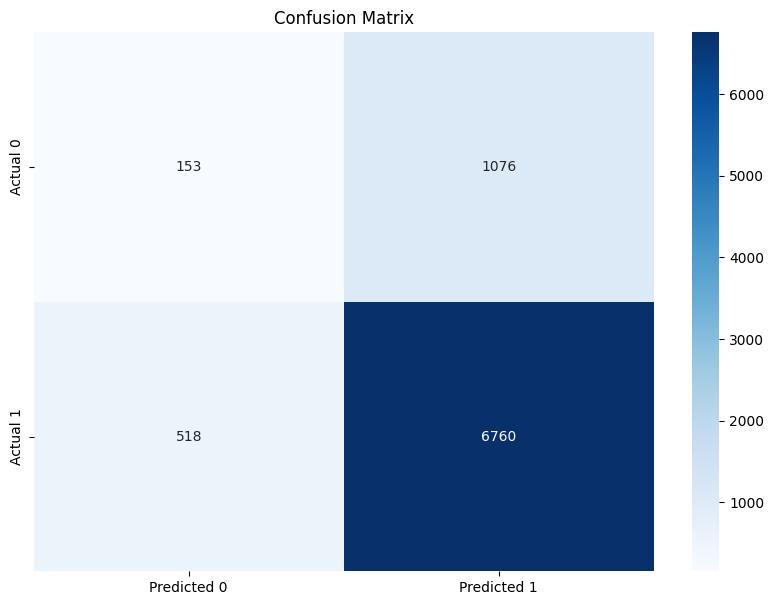

In [28]:
# call confusion matrix function
matrix = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()


### Interpretation
The model is heavily leaning towards predicting loans as fully paid inaccurately. This can be a huge impact to businesses because if you're categorizing loans as not risky by predicting them to be fully paid, that can expose your business to extensive losses through loan defaults. I believe based on the number of true negatives that there was an imbalance in the data set which led the model to automatically lean towards an outcome of fully paid if it was somewhere in the middle. Moving forward and building off this, analysts could look at oversampling or undersampling along with trying different models in addition to the KNN model.